#**A. Đọc dữ liệu**

In [1]:
import pandas as pd
from matplotlib import pyplot
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout
from keras.constraints import MaxNorm
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/DS102.N21_Học máy thống kê/Data/ho chi minh 2020-08-15 to 2023-05-05.csv')

##**Chia dữ liệu thành tập train và test**

In [3]:
data = dataset['temp'].values.reshape(-1, 1).astype('float32')
scaler = MinMaxScaler(feature_range=(-1, 1))
data = scaler.fit_transform(data)

window_size = 10
X = []
y = []
for i in range(len(data) - window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
X = np.array(X)
y = np.array(y)

train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#**B. LSTM - CÀI ĐẶT MÔ HÌNH HỌC SÂU**

##**1. LSTM (Long Short-Term Memory)**

Mô hình LSTM là một loại mạng nơ-ron hồi quy được sử dụng trong dự đoán nhiệt độ. Nó giúp giải quyết vấn đề mất mát thông tin và khả năng ghi nhớ hạn chế trong mạng RNN truyền thống. LSTM sử dụng cổng để điều chỉnh luồng thông tin và có khả năng ghi nhớ thông tin trong quá khứ lâu hơn. Điều này cho phép nó xử lý và học các mẫu phức tạp trong dữ liệu chuỗi nhiệt độ.

##**2. Huấn luyện mô hình**

In [4]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Add another dropout layer
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Mô hình này bao gồm một lớp LSTM với 100 đơn vị, kích thước đầu vào được xác định bởi hình dạng của X_train (số lượng mẫu, số lượng thời điểm, số chiều). Lớp Dropout với tỷ lệ 0.2 được thêm sau lớp LSTM để giảm overfitting. Cuối cùng, một lớp Dense với 1 đơn vị được sử dụng để tạo ra đầu ra dự đoán. Bảng thông tin mô hình (model summary) hiển thị cấu trúc của mô hình LSTM và số lượng tham số tương ứng. Dưới đây là giải thích cho các cột trong bảng:

- Layer (type): Tên của các lớp trong mô hình.
- Output Shape: Kích thước đầu ra của mỗi lớp. Đối với LSTM, output shape là (None, 100), có nghĩa là có 100 đơn vị đầu ra.
- Param #: Số lượng tham số (weights) của mỗi lớp. Trong trường hợp LSTM, có 40,800 tham số được tối ưu hóa.
- Total params: Tổng số lượng tham số trong toàn bộ mô hình.
- Trainable params: Số lượng tham số có thể được huấn luyện (tối ưu hóa) trong quá trình huấn luyện.
- Non-trainable params: Số lượng tham số không thể được huấn luyện, thường là các tham số cố định hoặc được định nghĩa trước.

Trong trường hợp này, mô hình LSTM có 40,901 tham số, tất cả đều có thể được huấn luyện.

##**3. Biểu đồ mất mát**

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
10/10 [==============================] - 4s 117ms/step - loss: 0.0964 - val_loss: 0.0683
Epoch 2/100
10/10 [==============================] - 0s 40ms/step - loss: 0.0637 - val_loss: 0.0546
Epoch 3/100
10/10 [==============================] - 0s 42ms/step - loss: 0.0579 - val_loss: 0.0543
Epoch 4/100
10/10 [==============================] - 0s 38ms/step - loss: 0.0551 - val_loss: 0.0522
Epoch 5/100
10/10 [==============================] - 0s 40ms/step - loss: 0.0533 - val_loss: 0.0495
Epoch 6/100
10/10 [==============================] - 0s 41ms/step - loss: 0.0512 - val_loss: 0.0492
Epoch 7/100
10/10 [==============================] - 0s 38ms/step - loss: 0.0504 - val_loss: 0.0483
Epoch 8/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0495 - val_loss: 0.0472
Epoch 9/100
10/10 [==============================] - 0s 40ms/step - loss: 0.0479 - val_loss: 0.0465
Epoch 10/100
10/10 [==============================] - 0s 42ms/step - loss: 0.0470 - val_loss: 0.045

Sử dụng Early Stopping để ngừng quá trình huấn luyện nếu không có sự cải thiện đáng kể trong val_loss sau một số lượng patience epochs.

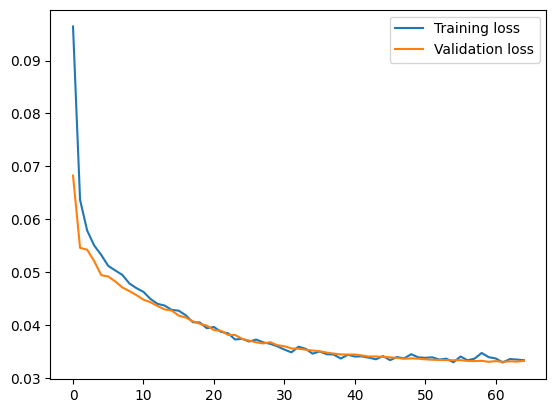

In [6]:
pyplot.plot(history.history['loss'], label='Training loss')
pyplot.plot(history.history['val_loss'], label='Validation loss')
pyplot.legend()
pyplot.show()

##**4.Dự đoán trên tập test**

In [7]:
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

inv_predicted = concatenate((yhat, X_test[:, 1:]), axis=1)
inv_predicted = scaler.inverse_transform(inv_predicted)
inv_predicted = inv_predicted[:, 0]

y_test = y_test.reshape((len(y_test), 1))
inv_actual = concatenate((y_test, X_test[:, 1:]), axis=1)
inv_actual = scaler.inverse_transform(inv_actual)
inv_actual = inv_actual[:, 0]

10/10 [==============================] - 1s 4ms/step


### **Biểu đồ dự đoán**

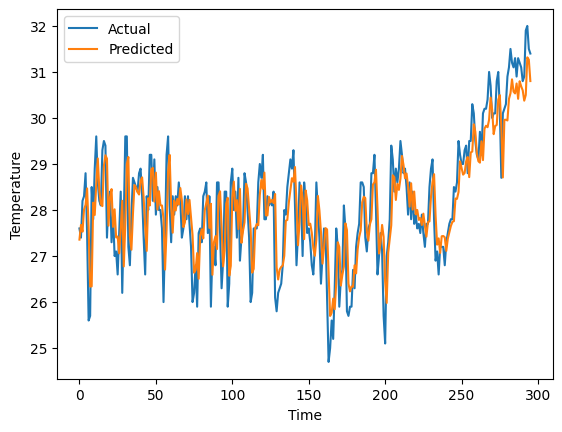

In [8]:
plt.plot(inv_actual, label='Actual')
plt.plot(inv_predicted, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### **Sai số sử dụng thang đo RMSE, R-squared**

In [9]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

rmse = np.sqrt(mean_squared_error(inv_actual, inv_predicted))
r2 = r2_score(inv_actual, inv_predicted)

print("Root Mean Squared Error:",rmse)
print("R-squared:", r2)

Root Mean Squared Error: 0.78491527
R-squared: 0.6709683241779926
